In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVR
import seaborn as sns

In [ ]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 35 columns]

In [ ]:
df.describe()

Age    DailyRate  ...  YearsSinceLastPromotion  YearsWithCurrManager
count  1470.000000  1470.000000  ...              1470.000000           1470.000000
mean     36.923810   802.485714  ...                 2.187755              4.123129
std       9.135373   403.509100  ...                 3.222430              3.568136
min      18.000000   102.000000  ...                 0.000000              0.000000
25%      30.000000   465.000000  ...                 0.000000              2.000000
50%      36.000000   802.000000  ...                 1.000000              3.000000
75%      43.000000  1157.000000  ...                 3.000000              7.000000
max      60.000000  1499.000000  ...                15.000000             17.000000

[8 rows x 26 columns]

In [ ]:
df.info()
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
print(df.apply(lambda col: col.unique()))

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe6e6434910>,
      dtype=object)

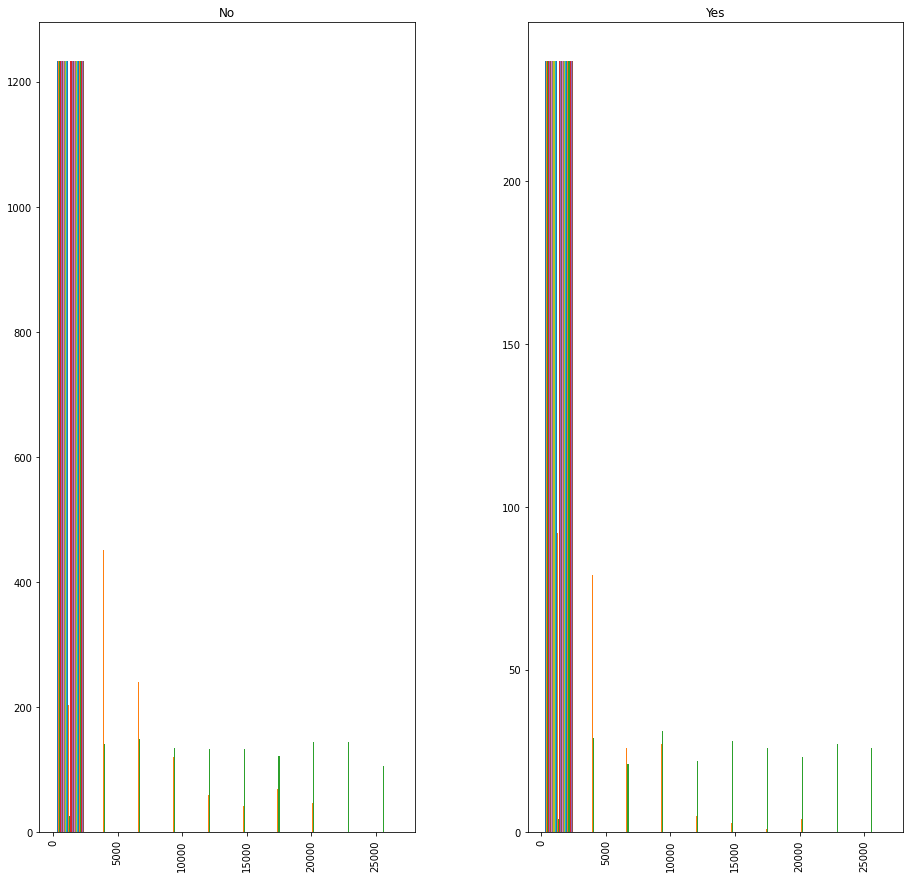

In [ ]:
df.hist(figsize=(15,15),by="Attrition")

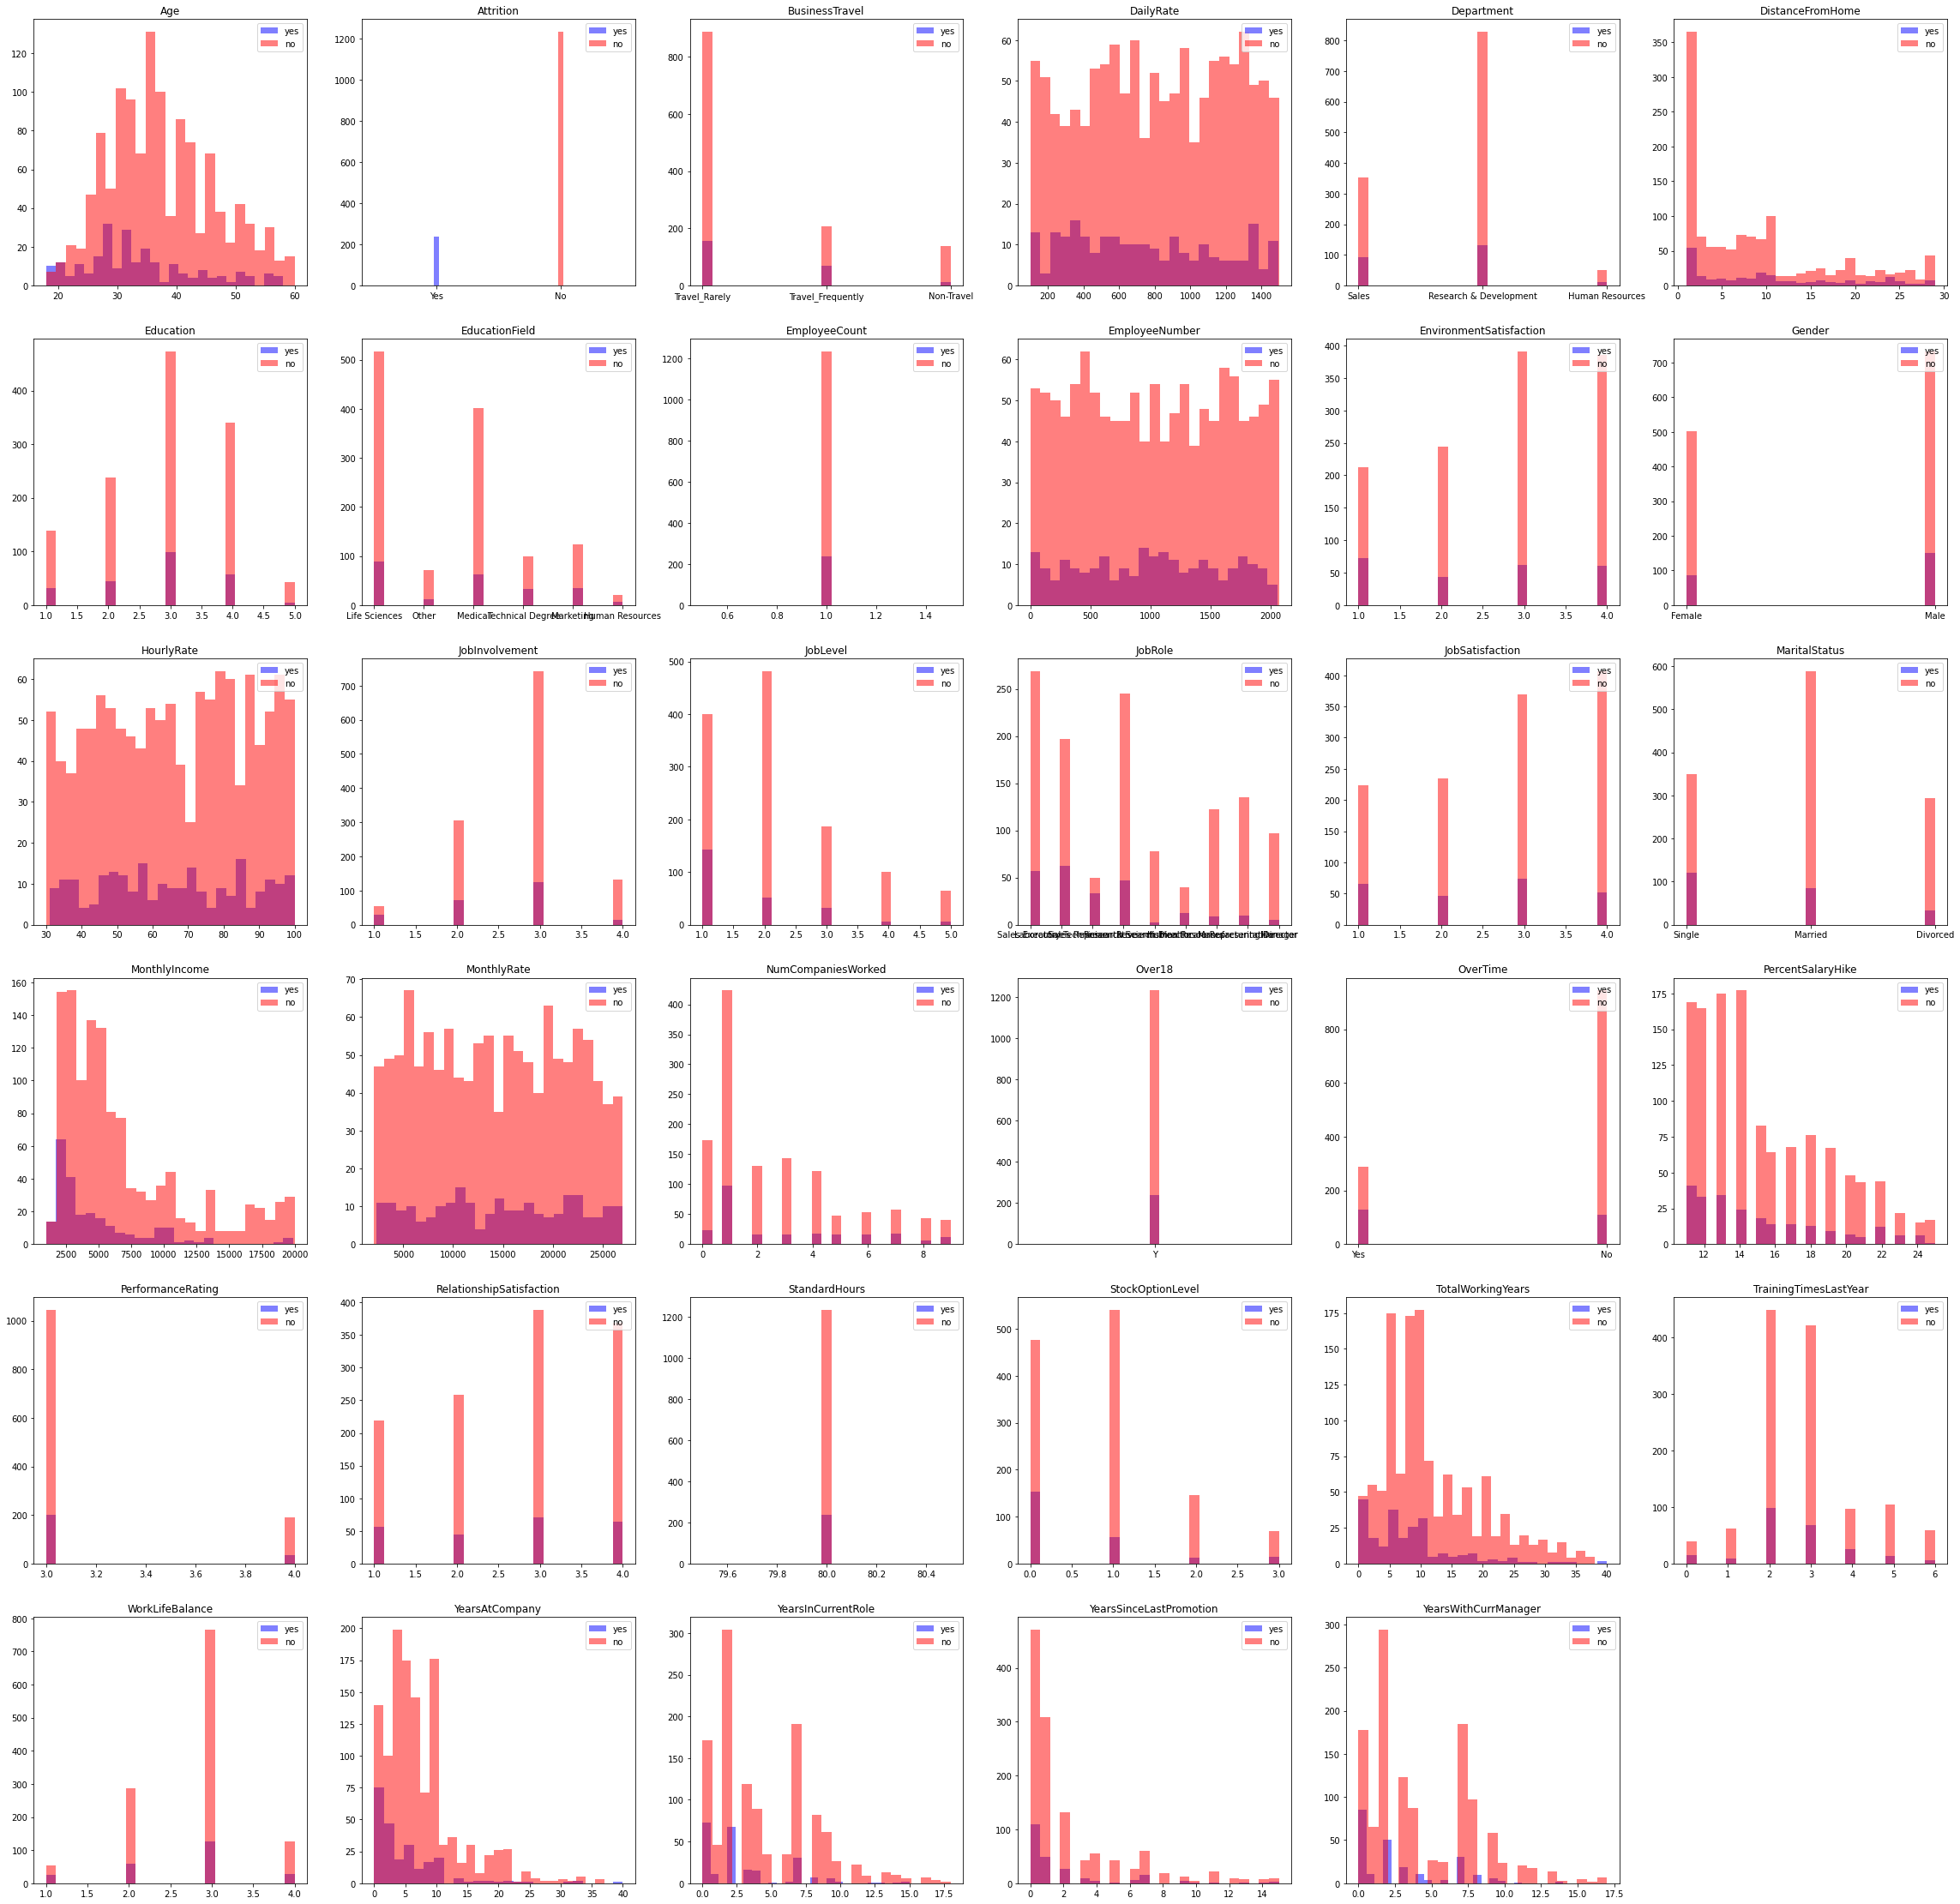

In [ ]:
k=1
plt.figure(figsize=(40, 40))
for col in df:
  yes = df[df['Attrition'] == 'Yes'][col]
  no = df[df['Attrition'] == 'No'][col]
  plt.subplot(6, 6, k)
  plt.hist(yes, bins=25, alpha=0.5, label='yes', color='b')
  plt.hist(no, bins=25, alpha=0.5, label='no', color='r')
  plt.legend(loc='upper right')
  plt.title(col)
  k+=1

Columns 'EmployeeCount','Over18','StandardHours' has only 1 unique value and hence can be dropped. Employee number is varying for each and hence does not provide any value in the predicttion. Hence it should be dropped too.

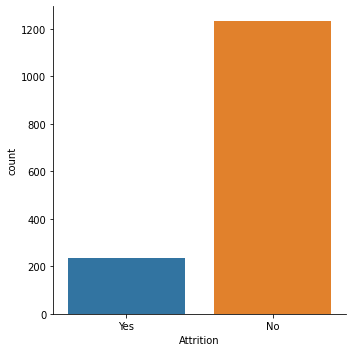

In [ ]:
sns.catplot(data=df,x="Attrition",kind='count')

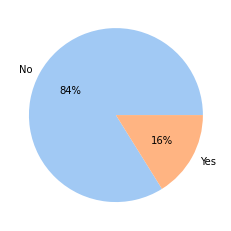

In [ ]:
colors = sns.color_palette("pastel", 2)
plt.pie(df['Attrition'].value_counts(),labels=['No','Yes'],autopct='%.0f%%',colors=colors)
plt.show()

Text(0.5, 1.0, 'Stacked Bar Chart of Job satisfaction vs attrition')

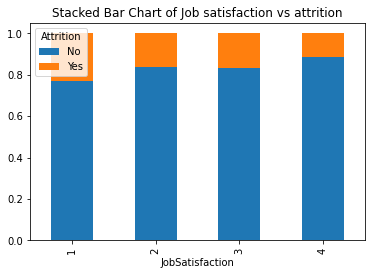

In [ ]:
table=pd.crosstab(df.JobSatisfaction, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Job satisfaction vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Overtime vs attrition')

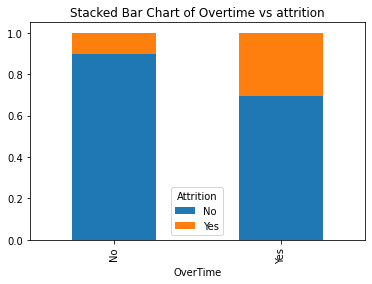

In [ ]:
table=pd.crosstab(df.OverTime, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Overtime vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Business Travel vs attrition')

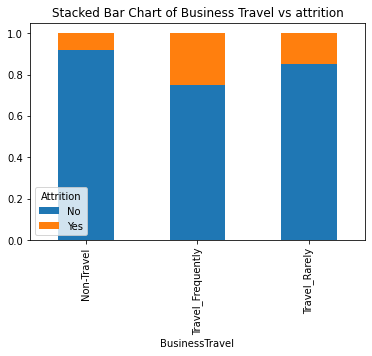

In [ ]:
table=pd.crosstab(df.BusinessTravel, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Business Travel vs attrition')

Text(0.5, 1.0, 'Stacked Bar Chart of Business Travel vs attrition')

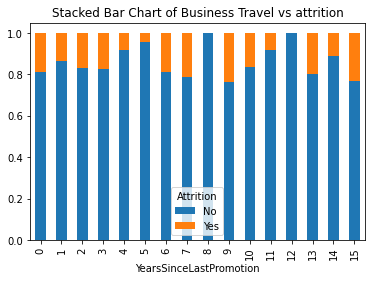

In [ ]:
table=pd.crosstab(df.YearsSinceLastPromotion, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Business Travel vs attrition')

We don't have many datapoints for the attrition =1. 

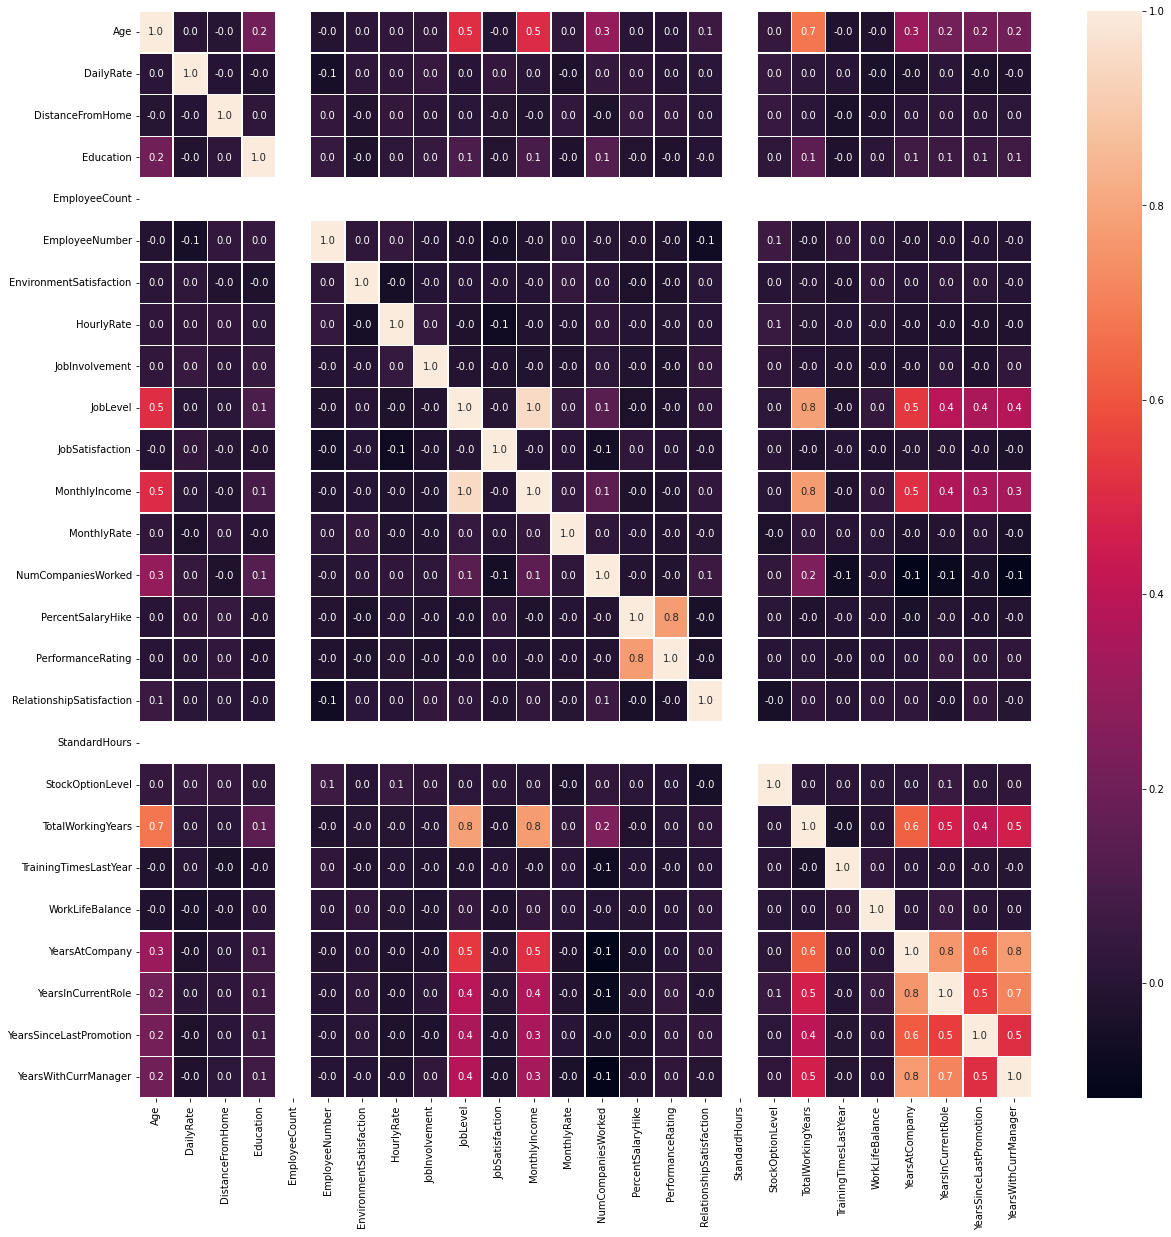

In [ ]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f')

In [ ]:
#df[['Education_Level','Pay_Scale']].apply(pd.Series.value_counts)
df.groupby(['TotalWorkingYears','YearsSinceLastPromotion']).size().unstack(fill_value=0)

YearsSinceLastPromotion  0   1   2   3   4   5   6   ...  9   10  11  12  13  14  15
TotalWorkingYears                                    ...                            
0                        11   0   0   0   0   0   0  ...   0   0   0   0   0   0   0
1                        70  11   0   0   0   0   0  ...   0   0   0   0   0   0   0
2                         9   3  19   0   0   0   0  ...   0   0   0   0   0   0   0
3                        15  14  13   0   0   0   0  ...   0   0   0   0   0   0   0
4                        23  18  20   2   0   0   0  ...   0   0   0   0   0   0   0
5                        50  25   7   4   2   0   0  ...   0   0   0   0   0   0   0
6                        43  61  13   2   6   0   0  ...   0   0   0   0   0   0   0
7                        45  18  12   0   1   3   0  ...   0   0   0   0   0   0   0
8                        44  27  11   3   1   1   1  ...   0   0   0   0   0   0   0
9                        35  35   8   3   3   2   2  ...   0   0   0   0   0   0   0
10                       77  45   8   8   7   5   7  ...   8   0   0   0   0   0   0
11                       14  12   1   3   2   0   0  ...   0   1   0   0   0   0   0
12                       16  10   4   3   2   5   3  ...   1   0   0   0   0   0   0
13                        9   7   2   3   3   5   2  ...   1   0   1   0   0   0   0
14                        9   3   2   4   2   4   3  ...   2   0   1   0   0   0   0
15                        7   7   5   2   4   5   3  ...   0   1   2   0   0   0   0
16                       12   4   5   3   4   2   3  ...   0   3   0   0   0   0   0
17                       12   6   1   0   2   4   3  ...   0   0   2   1   0   0   0
18                       12   3   1   1   2   2   1  ...   0   0   0   1   0   1   1
19                       11   2   5   1   1   0   0  ...   0   0   1   0   0   0   0
20                       10   9   5   2   0   0   0  ...   0   0   3   0   1   0   0
21                        8   6   2   0   3   1   1  ...   3   0   4   1   1   0   1
22                        4   4   3   1   0   1   0  ...   0   0   5   0   2   0   1
23                        3   2   3   0   3   1   0  ...   1   0   1   3   2   0   3
24                        4   3   1   2   2   1   0  ...   1   0   0   0   1   2   1
25                        5   2   1   1   1   1   0  ...   0   0   0   1   0   2   0
26                        4   3   0   2   2   1   0  ...   0   0   0   0   0   1   0
27                        3   2   1   0   1   0   0  ...   0   0   0   0   0   0   0
28                        2   2   1   0   3   0   0  ...   0   0   1   0   0   1   2
29                        3   2   0   0   1   0   0  ...   0   0   0   2   1   0   0
30                        1   2   2   0   1   0   1  ...   0   0   0   0   0   0   0
31                        3   1   0   1   0   1   1  ...   0   0   1   0   0   1   0
32                        2   3   1   0   0   0   0  ...   0   1   0   1   1   0   0
33                        1   1   0   1   0   0   1  ...   0   0   1   0   0   0   2
34                        1   2   0   0   0   0   0  ...   0   0   1   0   0   0   1
35                        1   1   0   0   0   0   0  ...   0   0   0   0   0   0   0
36                        1   0   2   0   1   0   0  ...   0   0   0   0   0   0   0
37                        1   0   0   0   1   0   0  ...   0   0   0   0   0   1   0
38                        0   1   0   0   0   0   0  ...   0   0   0   0   0   0   0
40                        0   0   0   0   0   0   0  ...   0   0   0   0   1   0   1

[40 rows x 16 columns]

# Hourly, monthly and weekly rates are given. Only hourly rate should do the job!!!!


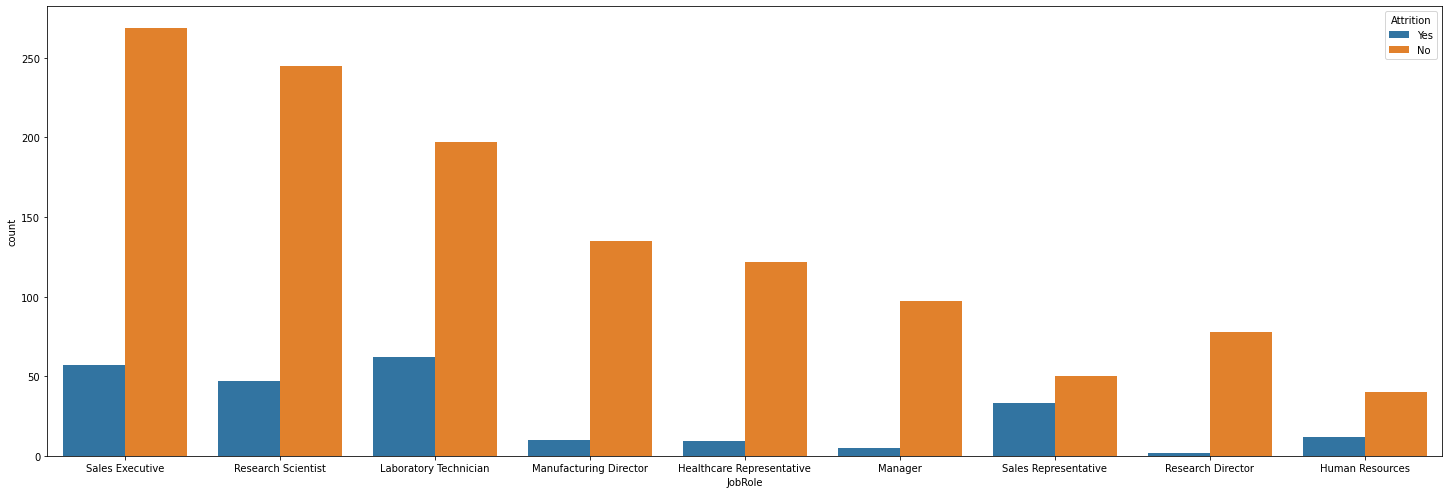

In [ ]:
a4_dims = (25, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=df,x="JobRole",hue="Attrition", ax=ax )

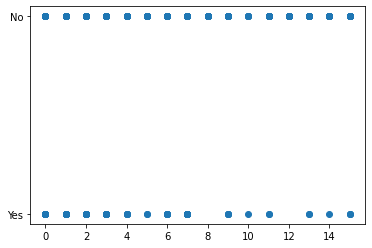

In [ ]:
plt.scatter(df['YearsSinceLastPromotion'],df['Attrition'])

<Figure size 1080x1080 with 0 Axes>

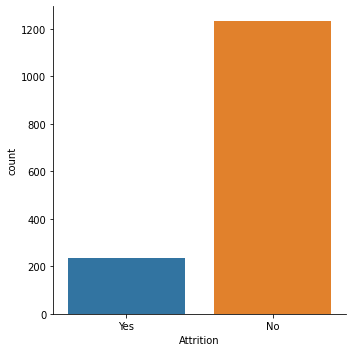

<Figure size 1080x1080 with 0 Axes>

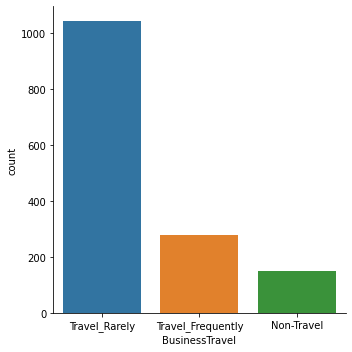

<Figure size 1080x1080 with 0 Axes>

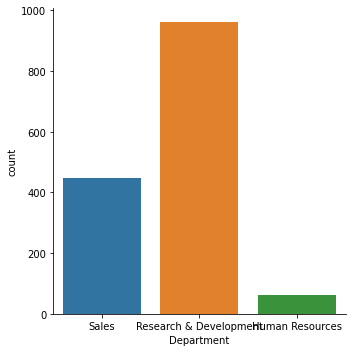

<Figure size 1080x1080 with 0 Axes>

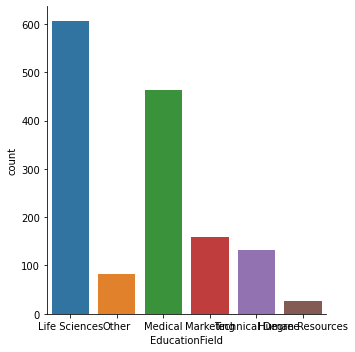

<Figure size 1080x1080 with 0 Axes>

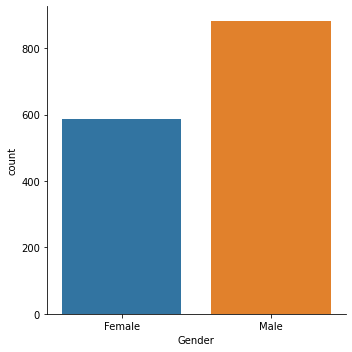

<Figure size 1080x1080 with 0 Axes>

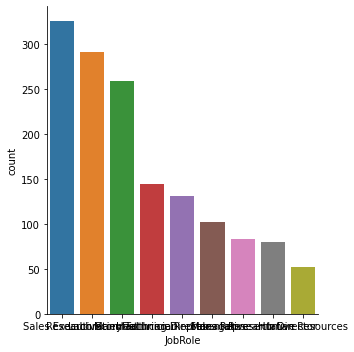

<Figure size 1080x1080 with 0 Axes>

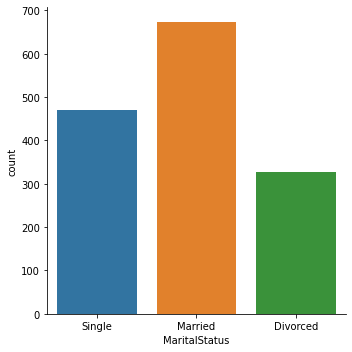

<Figure size 1080x1080 with 0 Axes>

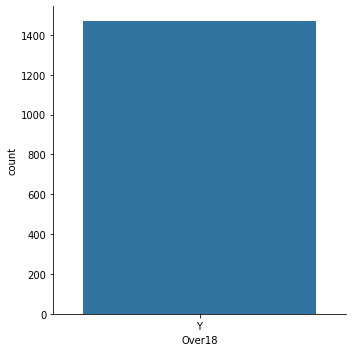

<Figure size 1080x1080 with 0 Axes>

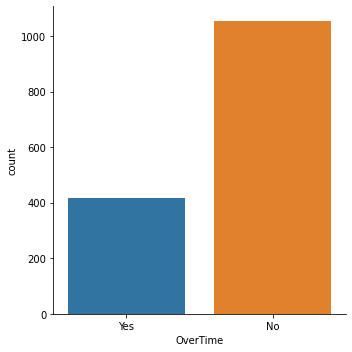

In [ ]:
cat_df=df.select_dtypes(include='object')

for i in cat_df:
    plt.figure(figsize=(15, 15))
    sns.catplot(data=df,x=i,kind='count')

In [ ]:
#missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:

#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
Y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.naive_bayes import ComplementNB,GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print(x_test.shape)

(294, 30)


In [ ]:
predicted=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[208,  28],
       [ 25,  33]])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,precision_score
print(classification_report(y_test, predicted))
print(accuracy_score(y_test, predicted))
print(precision_score(y_test, predicted))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       236
           1       0.54      0.57      0.55        58

    accuracy                           0.82       294
   macro avg       0.72      0.73      0.72       294
weighted avg       0.82      0.82      0.82       294

0.8197278911564626
0.5409836065573771


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))
  print(scores)
  print("Accuracy: ",np.mean(scores['test_accuracy']))
  print("Precision: ",np.mean(scores['test_precision']))
  print("Recall: ",np.mean(scores['test_recall']))
  print("F1 Score: ",np.mean(scores['test_f1']))

In [ ]:
cross_validation(GaussianNB(),X,Y)

{'fit_time': array([0.00483298, 0.00361919, 0.00223684, 0.00335073, 0.00225091]), 'score_time': array([0.00676417, 0.00359845, 0.00333643, 0.00358176, 0.00340557]), 'test_accuracy': array([0.81972789, 0.78571429, 0.7585034 , 0.77891156, 0.79251701]), 'test_precision': array([0.46268657, 0.39130435, 0.34615385, 0.375     , 0.39705882]), 'test_recall': array([0.64583333, 0.5625    , 0.57446809, 0.57446809, 0.57446809]), 'test_f1': array([0.53913043, 0.46153846, 0.432     , 0.45378151, 0.46956522])}
Accuracy:  0.7870748299319728
Precision:  0.3944407169347047
Recall:  0.5863475177304964
F1 Score:  0.47120312526348335
